# What is the most optimal skill to learn for Data Analysts?

## Methodology

1. Group skills to determin median salary of the skills & then determine likliehood each skills will appear in a job postings.
2. Visualise median salary vs percent skill is in demand.
3. Determin if certain technologies are more prevalent.


In [2]:
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
import seaborn as sns
from adjustText import adjust_text

# Loading Datasets
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [3]:
df_da_uk = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United Kingdom')].copy()
df_da_uk = df_da_uk.dropna(subset=['salary_year_avg'])

df_da_uk['salary_year_gbp'] = df_da_uk['salary_year_avg'] * 0.79 # convert currency into GBP. conversion taken 17/02/2025

In [4]:
df_da_uk_exploded = df_da_uk.explode('job_skills')

df_da_uk_exploded[['salary_year_gbp', 'job_skills']].head(5)

,salary_year_gbp,job_skills
2602,40301.06,excel
2602,40301.06,word
2602,40301.06,outlook
16526,79395.00,sql
16526,79395.00,jupyter


In [ ]:
df_da_skills = df_da_uk_exploded.groupby('job_skills')['salary_year_gbp'].agg(['count', 'median']).sort_values(by='count', ascending=False)

df_da_skills = df_da_skills.rename(columns={'count': 'skills_count', 'median': 'median_salary'})

da_job_count = len(df_da_uk)

df_da_skills['skill_percent'] = df_da_skills['skills_count'] / da_job_count * 100

skill_percent = 5

df_da_skills_high_demand = df_da_skills[df_da_skills['skill_percent'] > skill_percent]

df_da_skills_high_demand


,skills_count,median_salary,skill_percent
job_skills,,,
sql,33,77815.000,45.833333
excel,29,59684.500,40.277778
python,25,70389.000,34.722222
tableau,13,79395.000,18.055556
r,9,60843.825,12.500000
go,9,56090.000,12.500000
sas,8,63205.530,11.111111
power bi,7,70389.000,9.722222
outlook,6,42547.030,8.333333


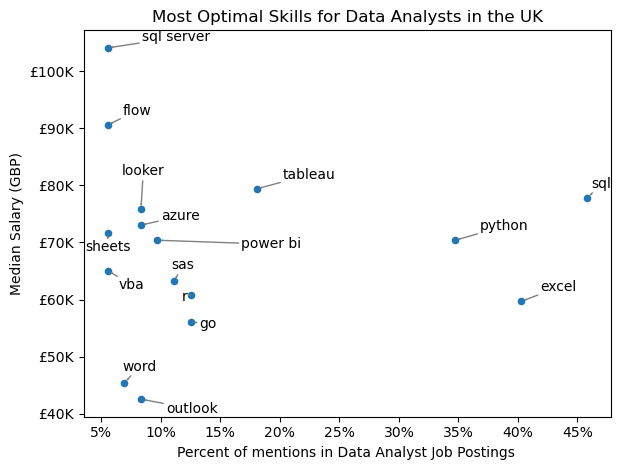

In [6]:
df_da_skills_high_demand.plot(kind='scatter', x='skill_percent', y='median_salary')
plt.xlabel('Percent of mentions in Data Analyst Job Postings ')
plt.ylabel('Median Salary (GBP)')
plt.title('Most Optimal Skills for Data Analysts in the UK')
plt.tight_layout()


texts = []
# Use a loop function to iterate through the .head(10) df_da_skills_high_demand to give us the location of each point on the graph.
for i, txt in enumerate(df_da_skills_high_demand.index):
    texts.append(plt.text(df_da_skills_high_demand['skill_percent'].iloc[i], df_da_skills_high_demand['median_salary'].iloc[i], txt))

ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'£{int(y/1000)}K'))
ax.xaxis.set_major_formatter(PercentFormatter(decimals=0))

adjust_text(
    texts,
    arrowprops=dict(arrowstyle="->", color='gray', lw=1),
    expand=(2, 2),
    force_text=(0.5, 1.0)
)


plt.show()

#### Adding Colour by the technology.
This is done using the job_type_skills column which is a dictionary with technolongy type as the key and skills for that technology type as the values.

In [ ]:
df_technology = df['job_type_skills'].copy()

#remove duplicates from column

df_technology = df_technology.drop_duplicates()

# remove Nan values

df_technology = df_technology.dropna()

#combine all dictionaries into one

technology_dict = {}
for row in df_technology:
    row_dict = ast.literal_eval(row) # convert string to dictionary
    for key, value in row_dict.items():
        if key in technology_dict: # if key already exists in technology_dict, add value to existing value
            technology_dict[key] += value
        else:
            technology_dict[key] = value

# remove duplicates by converting values to set then back to list.
for key, value in technology_dict.items():
    technology_dict[key] = list(set(value))
    
technology_dict



{'analyst_tools': ['microstrategy',
  'visio',
  'alteryx',
  'power bi',
  'powerbi',
  'outlook',
  'sharepoint',
  'sheets',
  'sas',
  'datarobot',
  'qlik',
  'cognos',
  'nuix',
  'ssrs',
  'esquisse',
  'tableau',
  'spreadsheet',
  'ssis',
  'excel',
  'splunk',
  'sap',
  'word',
  'dax',
  'msaccess',
  'powerpoint',
  'looker',
  'spss',
  'ms access'],
 'programming': ['lua',
  'golang',
  'fortran',
  'ocaml',
  'apl',
  'swift',
  'javascript',
  'kotlin',
  'matlab',
  'html',
  'perl',
  'crystal',
  'sas',
  'visual basic',
  'dart',
  'typescript',
  'python',
  'r',
  'solidity',
  'sql',
  'powershell',
  'php',
  'css',
  'no-sql',
  'nosql',
  'haskell',
  't-sql',
  'ruby',
  'cobol',
  'erlang',
  'groovy',
  'assembly',
  'scala',
  'elixir',
  'c++',
  'go',
  'mongo',
  'visualbasic',
  'shell',
  'julia',
  'bash',
  'c',
  'sass',
  'f#',
  'delphi',
  'c#',
  'java',
  'mongodb',
  'vba',
  'vb.net',
  'rust',
  'lisp',
  'clojure',
  'pascal',
  'objectiv

In [14]:
# turn dictionary into dataframe
df_technology = pd.DataFrame(list(technology_dict.items()), columns=['technology', 'skills'])

df_technology = df_technology.explode('skills')

print(df_da_skills, df_technology)


            skills_count  median_salary  skill_percent
job_skills                                            
sql                   33      77815.000      45.833333
excel                 29      59684.500      40.277778
python                25      70389.000      34.722222
tableau               13      79395.000      18.055556
r                      9      60843.825      12.500000
...                  ...            ...            ...
gdpr                   1      82950.000       1.388889
gcp                    1      41881.060       1.388889
pyspark                1      77815.000       1.388889
pytorch                1     140053.570       1.388889
aurora                 1     130350.000       1.388889

[62 rows x 3 columns]        technology           skills
0   analyst_tools    microstrategy
0   analyst_tools            visio
0   analyst_tools          alteryx
0   analyst_tools         power bi
0   analyst_tools          powerbi
..            ...              ...
9            sync

In [16]:
df_plot = df_da_skills_high_demand.merge(df_technology, left_on='job_skills', right_on='skills')

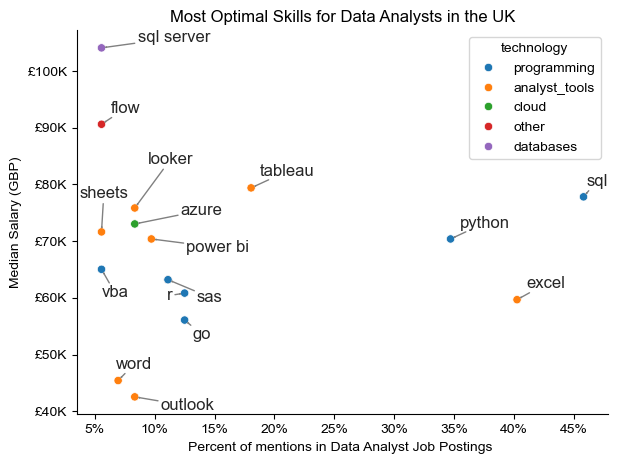

In [19]:
#df_plot.plot(kind='scatter', x='skill_percent', y='median_salary')
sns.scatterplot(
    data=df_plot,
    x='skill_percent',
    y='median_salary',
    hue='technology'
)

sns.despine()
sns.set_theme(style='ticks')

plt.xlabel('Percent of mentions in Data Analyst Job Postings ')
plt.ylabel('Median Salary (GBP)')
plt.title('Most Optimal Skills for Data Analysts in the UK')
plt.tight_layout()


texts = []
# Use a loop function to iterate through the .head(10) df_da_skills_high_demand to give us the location of each point on the graph.
for i, txt in enumerate(df_da_skills_high_demand.index):
    texts.append(plt.text(df_da_skills_high_demand['skill_percent'].iloc[i], df_da_skills_high_demand['median_salary'].iloc[i], txt))

ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'£{int(y/1000)}K'))
ax.xaxis.set_major_formatter(PercentFormatter(decimals=0))

adjust_text(
    texts,
    arrowprops=dict(arrowstyle="->", color='gray', lw=1),
    expand=(2, 2),
    force_text=(0.5, 1.0)
)


plt.show()